# Multi-Agent Orchestration: Interactive Experiments

This notebook provides an interactive environment for exploring the multi-agent orchestration framework.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from orchestration_framework import *
from synthetic_experiments import *

# Set random seed for reproducibility
np.random.seed(42)

# Configuration
M = 3  # Number of regions
N = 1000  # Number of tasks

## 1. Generate Task Stream

In [2]:
data_gen = SyntheticDataGenerator(M=M, seed=42)
tasks = data_gen.generate_task_stream(N)

print(f"Generated {len(tasks)} tasks")
print(f"Example task: region={tasks[0].region}, label={tasks[0].y}")

Generated 1000 tasks
Example task: region=1, label=0


## 2. Create Agents for Different Scenarios

### Scenario 1: Approximately Invariant

In [3]:
agents_invariant = create_agents_approximately_invariant(M)

print("Agent capabilities (approximately invariant):")
for agent in agents_invariant:
    print(f"{agent.name}: {agent.capabilities}")
    
app = compute_appropriateness(agents_invariant, M)
print(f"\nAppropriateness: {app:.3f}")

Agent capabilities (approximately invariant):
Agent_1: [0.35  0.336 0.314]
Agent_2: [0.339 0.338 0.323]
Agent_3: [0.349 0.322 0.329]
Agent_4: [0.331 0.311 0.357]

Appropriateness: 1.045


### Scenario 2: Dominant Agent

In [4]:
agents_dominant = create_agents_dominant(M)

print("Agent capabilities (dominant):")
for agent in agents_dominant:
    print(f"{agent.name}: {agent.capabilities}")
    
app = compute_appropriateness(agents_dominant, M)
print(f"\nAppropriateness: {app:.3f}")

Agent capabilities (dominant):
Agent_1: [0.65  0.852 0.877]
Agent_2: [0.399 0.298 0.303]
Agent_3: [0.079 0.076 0.069]
Agent_4: [0.031 0.091 0.274]

Appropriateness: 2.380


### Scenario 3: Varying Expertise

In [5]:
agents_varying = create_agents_varying(M)

print("Agent capabilities (varying):")
for agent in agents_varying:
    print(f"{agent.name}: {agent.capabilities}")
    
app = compute_appropriateness(agents_varying, M)
print(f"\nAppropriateness: {app:.3f}")

Agent capabilities (varying):
Agent_1: [0.65  0.076 0.274]
Agent_2: [0.399 0.298 0.303]
Agent_3: [0.079 0.852 0.069]
Agent_4: [0.031 0.091 0.877]

Appropriateness: 2.380


## 3. Run Single Orchestrator

Let's run the Paper orchestrator on the varying expertise scenario:

In [6]:
# Create fresh task copy
task_copy = [Task(x=t.x.copy(), y=t.y, region=t.region) for t in tasks]

# Run experiment
stats = run_experiment(agents_varying, PaperOrchestrator, task_copy)

print("Results for PaperOrchestrator:")
print(f"Overall Accuracy: {stats['overall_accuracy']:.3f}")
print(f"Agent Usage: {stats['agent_usage']}")

Results for PaperOrchestrator:
Overall Accuracy: 0.517
Agent Usage: {'Agent_1': 353, 'Agent_2': 1, 'Agent_3': 2, 'Agent_4': 644}


## 4. Compare All Orchestrators

In [7]:
results = run_all_baselines(agents_varying, tasks, verbose=True)


RandomOrchestrator:
  Overall Accuracy: 0.325
  Agent Usage: {'Agent_1': 253, 'Agent_2': 243, 'Agent_3': 251, 'Agent_4': 253}

GreedyOrchestrator:
  Overall Accuracy: 0.774
  Agent Usage: {'Agent_1': 363, 'Agent_2': 6, 'Agent_3': 331, 'Agent_4': 300}

UCB1Orchestrator:
  Overall Accuracy: 0.725
  Agent Usage: {'Agent_1': 309, 'Agent_2': 56, 'Agent_3': 331, 'Agent_4': 304}

PaperOrchestrator:
  Overall Accuracy: 0.523
  Agent Usage: {'Agent_1': 684, 'Agent_2': 2, 'Agent_3': 3, 'Agent_4': 311}

OracleOrchestrator:
  Overall Accuracy: 0.786
  Agent Usage: {'Agent_1': 353, 'Agent_2': 0, 'Agent_3': 334, 'Agent_4': 313}


## 5. Visualize Learning Curves

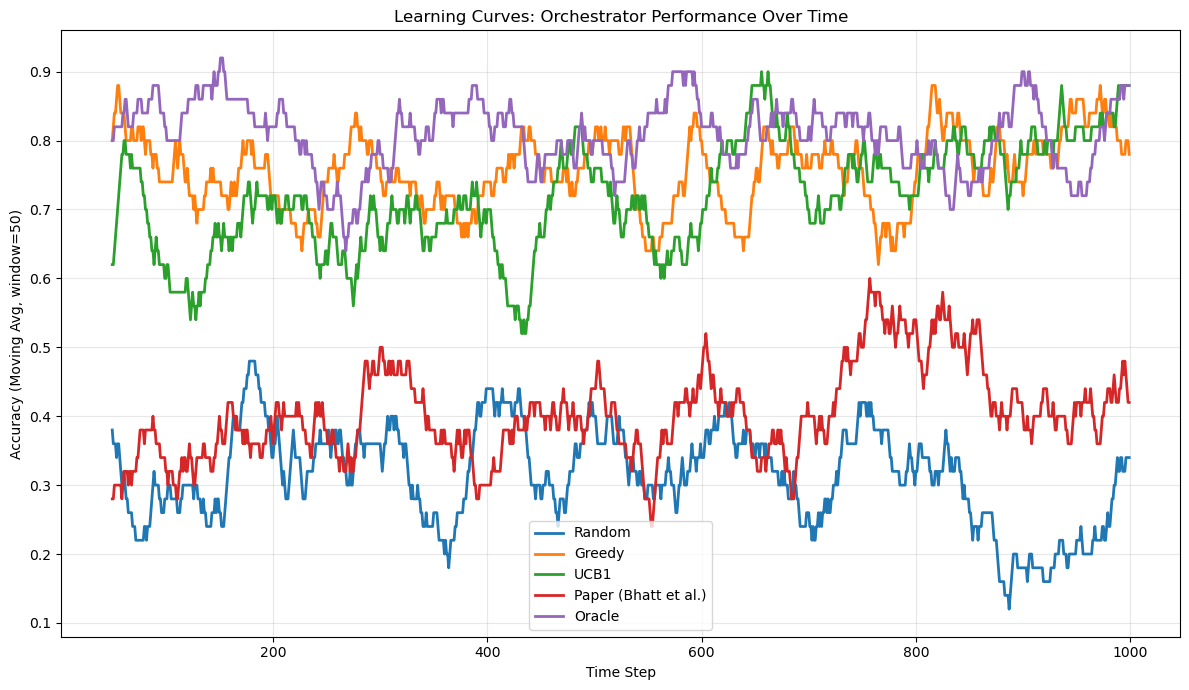

In [8]:
fig = plot_learning_curves(agents_varying, tasks, window_size=50)
plt.show()

## 6. Custom Agent Configuration

Create your own agents with custom capabilities:

In [9]:
# Define custom agent capabilities
custom_agents = [
    Agent("Expert_A", capabilities=np.array([0.9, 0.3, 0.3]), costs=np.array([10, 10, 10])),
    Agent("Expert_B", capabilities=np.array([0.3, 0.9, 0.3]), costs=np.array([10, 10, 10])),
    Agent("Expert_C", capabilities=np.array([0.3, 0.3, 0.9]), costs=np.array([10, 10, 10])),
    Agent("Generalist", capabilities=np.array([0.6, 0.6, 0.6]), costs=np.array([5, 5, 5]))
]

print("Custom agent configuration:")
for agent in custom_agents:
    print(f"{agent.name}: capabilities={agent.capabilities}, costs={agent.costs}")
    
app = compute_appropriateness(custom_agents, M)
print(f"\nAppropriateness: {app:.3f}")

# Run experiments
custom_results = run_all_baselines(custom_agents, tasks, verbose=True)

Custom agent configuration:
Expert_A: capabilities=[0.9 0.3 0.3], costs=[10 10 10]
Expert_B: capabilities=[0.3 0.9 0.3], costs=[10 10 10]
Expert_C: capabilities=[0.3 0.3 0.9], costs=[10 10 10]
Generalist: capabilities=[0.6 0.6 0.6], costs=[5 5 5]

Appropriateness: 1.714

RandomOrchestrator:
  Overall Accuracy: 0.521
  Agent Usage: {'Expert_A': 271, 'Expert_B': 239, 'Expert_C': 250, 'Generalist': 240}

GreedyOrchestrator:
  Overall Accuracy: 0.919
  Agent Usage: {'Expert_A': 355, 'Expert_B': 336, 'Expert_C': 309, 'Generalist': 0}

UCB1Orchestrator:
  Overall Accuracy: 0.840
  Agent Usage: {'Expert_A': 310, 'Expert_B': 312, 'Expert_C': 272, 'Generalist': 106}

PaperOrchestrator:
  Overall Accuracy: 0.511
  Agent Usage: {'Expert_A': 991, 'Expert_B': 2, 'Expert_C': 2, 'Generalist': 5}

OracleOrchestrator:
  Overall Accuracy: 0.883
  Agent Usage: {'Expert_A': 353, 'Expert_B': 334, 'Expert_C': 313, 'Generalist': 0}


## 7. Analyze Agent Selection Patterns

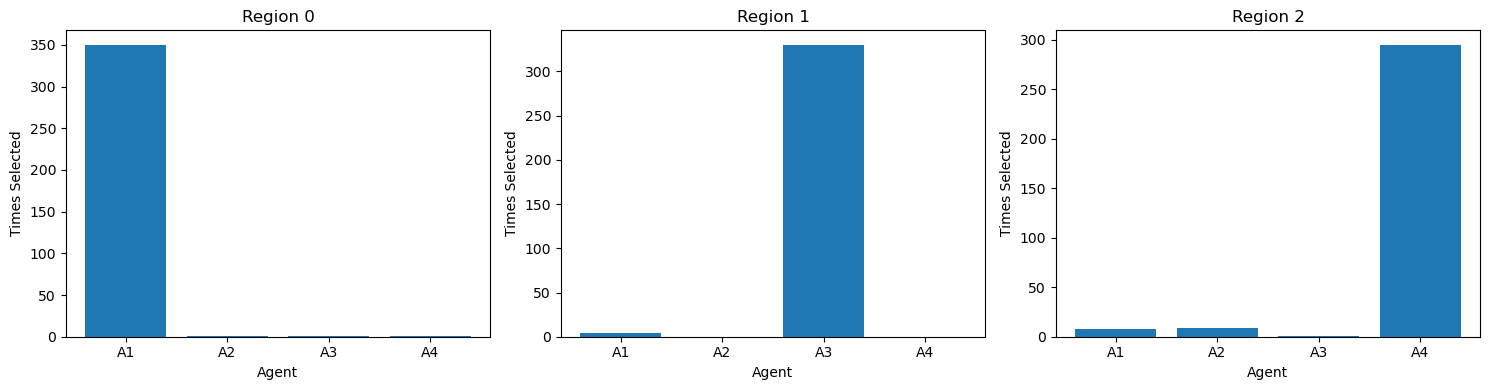


True optimal agent per region:
Region 0: Agent_1
Region 1: Agent_3
Region 2: Agent_4


In [10]:
# Run Paper orchestrator and track selections over time
orchestrator = PaperOrchestrator(agents_varying, M)

selections_by_region = {i: [] for i in range(M)}
task_copy = [Task(x=t.x.copy(), y=t.y, region=t.region) for t in tasks]

for t, task in enumerate(task_copy):
    agent_idx = orchestrator.select_agent(task, t)
    prediction = agents_varying[agent_idx].predict(task)
    orchestrator.update(agent_idx, task, prediction)
    
    selections_by_region[task.region].append(agent_idx)

# Plot selection patterns
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for region_idx in range(M):
    ax = axes[region_idx]
    
    # Count selections
    selections = selections_by_region[region_idx]
    counts = [selections.count(i) for i in range(len(agents_varying))]
    
    ax.bar(range(len(agents_varying)), counts)
    ax.set_xlabel('Agent')
    ax.set_ylabel('Times Selected')
    ax.set_title(f'Region {region_idx}')
    ax.set_xticks(range(len(agents_varying)))
    ax.set_xticklabels([f'A{i+1}' for i in range(len(agents_varying))])

plt.tight_layout()
plt.show()

print("\nTrue optimal agent per region:")
for m in range(M):
    best_agent = np.argmax([agent.get_capability(m) for agent in agents_varying])
    print(f"Region {m}: Agent_{best_agent+1}")

## 8. UCB1 Exploration Parameter Sensitivity

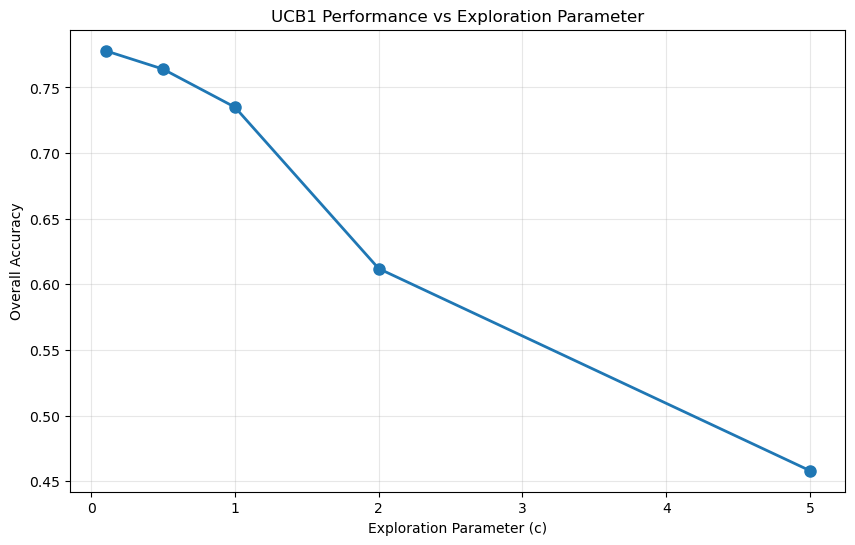

UCB1 Accuracy by exploration parameter:
c=0.1: 0.778
c=0.5: 0.764
c=1.0: 0.735
c=2.0: 0.612
c=5.0: 0.458


In [11]:
# Test different exploration parameters
c_values = [0.1, 0.5, 1.0, 2.0, 5.0]
ucb_results = {}

for c in c_values:
    task_copy = [Task(x=t.x.copy(), y=t.y, region=t.region) for t in tasks]
    stats = run_experiment(agents_varying, UCB1Orchestrator, task_copy, {'c': c})
    ucb_results[c] = stats['overall_accuracy']

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(c_values, [ucb_results[c] for c in c_values], 'o-', linewidth=2, markersize=8)
plt.xlabel('Exploration Parameter (c)')
plt.ylabel('Overall Accuracy')
plt.title('UCB1 Performance vs Exploration Parameter')
plt.grid(alpha=0.3)
plt.show()

print("UCB1 Accuracy by exploration parameter:")
for c, acc in ucb_results.items():
    print(f"c={c}: {acc:.3f}")

## 9. Compare All Scenarios


Scenario: Approx. Invariant

Accuracies:
  RandomOrchestrator  : 0.314
  GreedyOrchestrator  : 0.350
  UCB1Orchestrator    : 0.338
  PaperOrchestrator   : 0.352
  OracleOrchestrator  : 0.342

Scenario: Dominant

Accuracies:
  RandomOrchestrator  : 0.319
  GreedyOrchestrator  : 0.780
  UCB1Orchestrator    : 0.739
  PaperOrchestrator   : 0.785
  OracleOrchestrator  : 0.778

Scenario: Varying

Accuracies:
  RandomOrchestrator  : 0.334
  GreedyOrchestrator  : 0.678
  UCB1Orchestrator    : 0.706
  PaperOrchestrator   : 0.800
  OracleOrchestrator  : 0.790


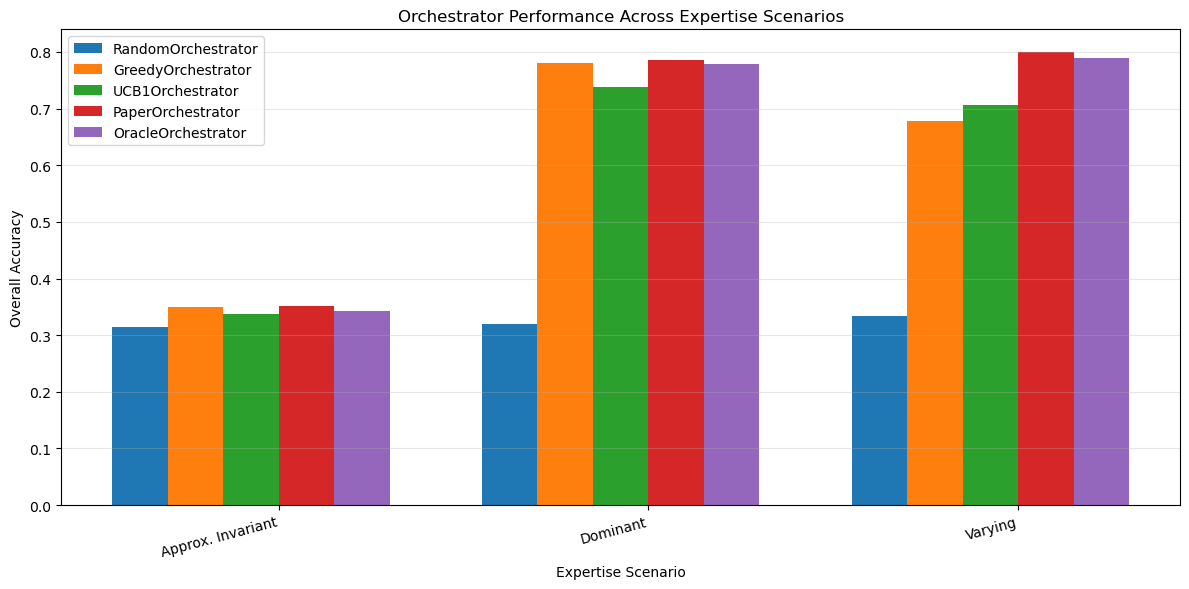

In [12]:
scenarios = {
    'Approx. Invariant': agents_invariant,
    'Dominant': agents_dominant,
    'Varying': agents_varying
}

all_results = {}
for scenario_name, agents in scenarios.items():
    print(f"\n{'='*60}")
    print(f"Scenario: {scenario_name}")
    print('='*60)
    results = run_all_baselines(agents, tasks, verbose=False)
    all_results[scenario_name] = results
    
    print("\nAccuracies:")
    for orch_name, stats in results.items():
        print(f"  {orch_name:20s}: {stats['overall_accuracy']:.3f}")

# Visualize
fig = plot_results(all_results)
plt.show()